In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc

In [3]:
print (tf.__version__)

2.15.1


In [4]:
# Import data
#!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
df = pd.read_csv('https://raw.githubusercontent.com/valemicolgarcia/TensorFlow/main/HealthCareCost/insurance.csv')
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


-----------------------------------------------------------------------------

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [35]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [6]:
Y_df = df['expenses']
Y_df.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [7]:
X_df = df.drop(columns='expenses')
X_df.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest


In [8]:
CATEGORICAL = ['sex', 'smoker', 'region']
NUMERIC = ['age', 'bmi', 'children']

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in CATEGORICAL:
    label_encoder.fit([column])
    X_df[column] = label_encoder.fit_transform(X_df[column])

X_df.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1


### Training vs testing data

In [10]:
from sklearn.model_selection import train_test_split
X_train_df, X_test_df = train_test_split(X_df, test_size=0.2, random_state=42)
Y_train_df, Y_test_df = train_test_split(Y_df, test_size=0.2, random_state=42)

### Training process

In [25]:
from sklearn.preprocessing import StandardScaler

# Inicializa el escalador
scaler = StandardScaler()

# Ajusta el escalador solo con el conjunto de entrenamiento y transforma los datos
X_train_scaled = scaler.fit_transform(X_train_df)

# Transforma el conjunto de prueba
X_test_scaled = scaler.transform(X_test_df)


### Creating the model

In [41]:


# modelo con Keras
model = keras.Sequential([
     layers.Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Compilo el modelo
model.compile(optimizer='adam', 
              loss='mean_squared_error',  # Pérdida para regresión
              metrics=['mean_absolute_error', 'mean_squared_error'])

# Entreno el modelo
model.fit(X_train_scaled, Y_train_df, epochs=50, batch_size=16, validation_split=0.2) 




Epoch 1/50
54/54 [==============================] - 1s 7ms/step - loss: 325317312.0000 - mean_absolute_error: 13513.6367 - mean_squared_error: 325317312.0000 - val_loss: 309845568.0000 - val_mean_absolute_error: 12637.5361 - val_mean_squared_error: 309845568.0000
Epoch 2/50
54/54 [==============================] - 0s 3ms/step - loss: 322856224.0000 - mean_absolute_error: 13440.2500 - mean_squared_error: 322856224.0000 - val_loss: 304181344.0000 - val_mean_absolute_error: 12461.2793 - val_mean_squared_error: 304181344.0000
Epoch 3/50
54/54 [==============================] - 0s 3ms/step - loss: 307508960.0000 - mean_absolute_error: 12994.3848 - mean_squared_error: 307508960.0000 - val_loss: 276657536.0000 - val_mean_absolute_error: 11650.7012 - val_mean_squared_error: 276657536.0000
Epoch 4/50
54/54 [==============================] - 0s 3ms/step - loss: 255845808.0000 - mean_absolute_error: 11507.3691 - mean_squared_error: 255845808.0000 - val_loss: 205832464.0000 - val_mean_absolute_err

--------------------------------------------------------------------------------

9/9 - 0s - loss: 25373656.0000 - mean_absolute_error: 3286.3088 - mean_squared_error: 25373656.0000 - 60ms/epoch - 7ms/step
Testing set Mean Abs Error: 3286.31 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


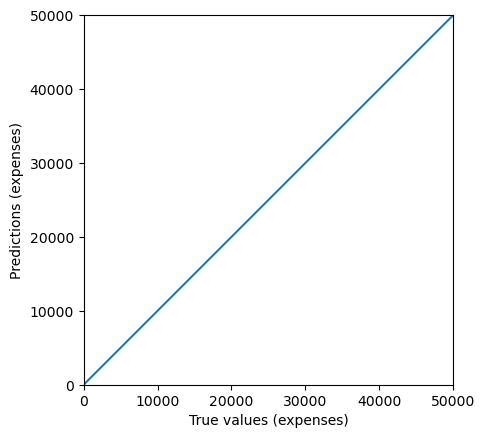

In [42]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(X_test_scaled, Y_test_df, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(X_test_df).flatten()

a = plt.axes(aspect='equal')
plt.scatter(Y_test_df, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
